In [18]:
#Author: @michaelbrink
#Org: BalloonBox Inc.

In [19]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Imported the data files

In [20]:
df_detail = pd.read_csv('Fortune500-2_cleaned.csv')
df_all = pd.read_csv('Fortune500_cleaned.csv')

# Modelling

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn

In [22]:
def determine_k_Kmeans(df):
    # Use the Elbow Method to show the optimal k in KMeans
    distortions = []
    K = range(1,15)
    for k in K:
        cluster_model = KMeans(n_clusters=k,random_state=11)
        cluster_model.fit(df)
        distortions.append(sum(np.min(cdist(df,cluster_model.cluster_centers_,'euclidean'),axis=1))/df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

## Overall dataset from 2017 to 2020(df_all)

In [30]:
df_all.head()

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Change in rank (1000),Employees,...,Market Value ($M)_cat_1,Market Value ($M)_cat_2,Market Value ($M)_cat_3,Market Value ($M)_cat_4,Market Value ($M)_cat_5,Employees_cat_1,Employees_cat_2,Employees_cat_3,Employees_cat_4,Employees_cat_5
0,11,AmerisourceBergen,146850.0,8.0,1427.9,0.0,33656.0,19229.0,1,18500,...,0,0,0,0,1,0,0,0,1,0
1,15,Cardinal Health,121546.0,18.5,1427.0,17.4,34122.0,25725.0,6,37300,...,0,0,0,0,1,0,0,0,0,1
2,34,Phillips 66,72396.0,-16.9,1555.0,-63.2,51653.0,40954.0,-4,14800,...,0,0,0,0,1,0,0,0,1,0
3,37,Valero Energy,70166.0,-14.2,2289.0,-42.6,46173.0,29746.0,-5,9996,...,0,0,0,0,1,0,0,1,0,0
4,45,Archer Daniels Midland,62346.0,-7.9,1279.0,-30.8,39769.0,26274.0,-4,31800,...,0,0,0,0,1,0,0,0,0,1


In [39]:
# Extract features and target
X = df_all.copy()
drop_list = ['Rank', 'Name','Year','Revenue ($M)','Profit ($M)','Assets ($M)','Market Value ($M)','Employees',\
             'Revenue % change','Profit % change','Change in rank (1000)','Change in rank (500)']
X.drop(columns=drop_list,inplace=True)
y = df_all['Revenue ($M)']
# Train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

# # Standard Scaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [43]:
X

,No Filter,Female CEO,Founder CEO,Profit ($M)_cat_1,Profit ($M)_cat_2,Profit ($M)_cat_3,Profit ($M)_cat_4,Profit ($M)_cat_5,Assets ($M)_cat_1,Assets ($M)_cat_2,...,Market Value ($M)_cat_1,Market Value ($M)_cat_2,Market Value ($M)_cat_3,Market Value ($M)_cat_4,Market Value ($M)_cat_5,Employees_cat_1,Employees_cat_2,Employees_cat_3,Employees_cat_4,Employees_cat_5
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2797,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2798,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2799,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


### Linear Model

In [40]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear model
linear_model = LinearRegression()
# Fit the model
linear_model.fit(X_train_scaled,y_train)

# Coefs for each feature
coefs = list(linear_model.coef_)
# Features
features = X_train.columns
# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs[index],2)

index = list(res_dict.keys())
coef = list(res_dict.values())
coef_df = pd.DataFrame(index=index,data=coef,columns=['Coef'])
coef_df['Positive_relationship'] = np.where(coef_df['Coef']>0,1,-1)
coef_df

,Coef,Positive_relationship
No Filter,1.149941e+15,1
Female CEO,8.803519e+14,1
Founder CEO,7.674040e+14,1
Profit ($M)_cat_1,9.457836e+15,1
Profit ($M)_cat_2,9.379981e+15,1
Profit ($M)_cat_3,9.387848e+15,1
Profit ($M)_cat_4,9.518833e+15,1
Profit ($M)_cat_5,9.185561e+15,1
Assets ($M)_cat_1,4.883828e+16,1
Assets ($M)_cat_2,4.949685e+16,1


MAE: 2.3383242283362216e+16
MSE: 5.4699351079592886e+32
RMSE: 2.338789239747628e+16


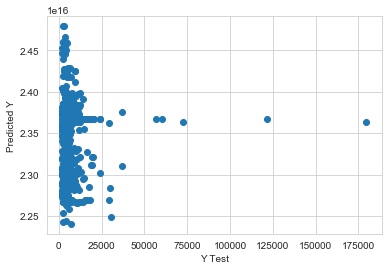

In [41]:
# Prediction vs real value
y_predicted = linear_model.predict(X_test)
plt.scatter(y_test,y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

### SVR(Linear)

In [10]:
from sklearn.svm import SVR

# Instantiate the linear model
SVR_model = SVR(kernel='linear')
# Fit the model
SVR_model.fit(X_train,y_train)

# Coefs for each feature
coefs = list(SVR_model.coef_)
# Features
features = X_train.columns
# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs[0][index],2)

index = list(res_dict.keys())
coef = list(res_dict.values())
coef_df = pd.DataFrame(index=index,data=coef,columns=['Coef'])
coef_df['Postive_relationship'] = np.where(coef_df['Coef']>0,1,-1)
coef_df

,Coef,Postive_relationship
Female CEO,7.19,1
Founder CEO,11.00,1
Revenue ($M)_cat_1,234.95,1
Revenue ($M)_cat_2,115.98,1
Revenue ($M)_cat_3,-1.54,-1
Revenue ($M)_cat_4,-117.77,-1
Revenue ($M)_cat_5,-231.62,-1
Profit ($M)_cat_1,3.51,1
Profit ($M)_cat_2,11.33,1
Profit ($M)_cat_3,2.33,1


MAE: 52.13485221787837
MSE: 4411.008170391444
RMSE: 66.41542117905632


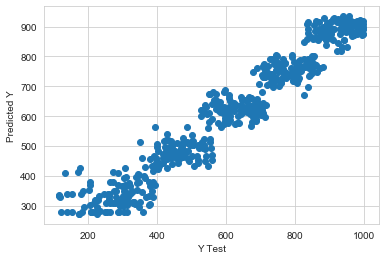

In [11]:
# Prediction vs real value
y_predicted = SVR_model.predict(X_test)
plt.scatter(y_test,y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

## Detailed dataset

In [12]:
df_detail.head()

,Country,Headquarters,Industry,CEO,Website,Company Type,Ticker,Revenues ($M),Profits ($M),Market Value ($M),...,Total Stockholder Equity ($M)_cat_1,Total Stockholder Equity ($M)_cat_2,Total Stockholder Equity ($M)_cat_3,Total Stockholder Equity ($M)_cat_4,Total Stockholder Equity ($M)_cat_5,Earnings Per Share ($)_cat_1,Earnings Per Share ($)_cat_2,Earnings Per Share ($)_cat_3,Earnings Per Share ($)_cat_4,Earnings Per Share ($)_cat_5
0,U.S.,Rosemont Ill.,Wholesalers: Food and Grocery,Pietro Satriano,https://www.usfoods.com,Public,USFD,25939.0,385.0,3898.4,...,0,0,0,1,0,0,1,0,0,0
1,U.S.,Bellevue Wash.,Construction and Farm Machinery,R. Preston Feight,https://www.paccar.com,Public,PCAR,25599.7,2387.9,21174.9,...,0,0,0,0,1,0,0,0,0,1
2,U.S.,Parsippany N.J.,Petroleum Refining,Thomas J. Nimbley,https://www.pbfenergy.com,Public,PBF,24508.2,319.4,848.1,...,0,0,0,1,0,0,0,1,0,0
3,U.S.,Tulsa Okla.,Pipelines,H. Michael Krimbill,https://www.nglenergypartners.com,Public,NGL,24087.8,360.0,333.7,...,0,0,1,0,0,0,0,1,0,0
4,U.S.,Bloomfield Hills Mich.,Automotive Retailing Services,Roger S. Penske,https://www.penskeautomotive.com,Public,PAG,23179.4,435.8,2264.9,...,0,0,0,1,0,0,0,0,0,1


In [13]:
df_detail_copy = df_detail.copy()
# Drop list
cols=['Country', 'Headquarters', 'Industry', 'CEO', 'Website', 'Company Type',
       'Ticker', 'Revenues ($M)', 'Profits ($M)', 'Market Value ($M)',
       'Employees', 'Assets ($M)', 'Total Stockholder Equity ($M)',
       'Profit as % of Revenues', 'Profits as % of Assets',
       'Profits as % of Stockholder Equity', 'Earnings Per Share ($)',
       'EPS % Change (from 2018)', 'EPS % Change (5 year annual rate)',
       'EPS % Change (10 year annual rate)',
       'Total Return to Investors (2019)',
       'Total Return to Investors (5 year annualized)',
       'Total Return to Investors (10 year annualized)']

if 'Country' in df_detail_copy.columns:
    df_detail_copy.drop(columns=cols,inplace=True)

# # Standard Scaler
# scaler = StandardScaler()
# scaler.fit(df_detail_copy)
# df_detail_scaled = scaler.transform(df_detail_copy)
# df_scaled = pd.DataFrame(data=df_detail_scaled,columns=df_detail_copy.columns)

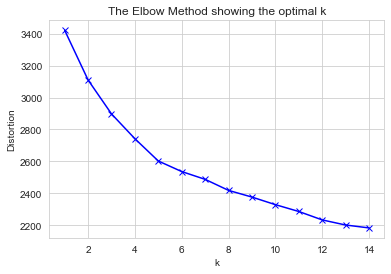

'K=5'

In [14]:
k_range = np.arange(1,15)
inertia_list = []
for k in k_range:
    cluster_model=KMeans(n_clusters=k,random_state=11)
    cluster_model.fit(df_detail_copy)
    inertia_list.append(cluster_model.inertia_)

# Plot the elbow
plt.plot(k_range, inertia_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''K=5'''

In [15]:
# Fit the KMeans clustering model with K=5
cluster_model=KMeans(n_clusters=5,random_state=11)
# Predict the labels
labels = cluster_model.fit_predict(df_detail_copy)

# centroids Information
centroids = pd.DataFrame(cluster_model.cluster_centers_,columns=df_detail_copy.columns)
centroids = centroids.round(1).T
centroids = pd.DataFrame(np.where(centroids>=0.5,1,0),index=centroids.index,columns=centroids.columns)
display(centroids)
print(np.unique(labels,return_counts=True))

,0,1,2,3,4
Revenues ($M)_cat_1,0,0,0,0,0
Revenues ($M)_cat_2,0,0,0,0,0
Revenues ($M)_cat_3,0,0,0,0,0
Revenues ($M)_cat_4,0,0,0,0,0
Revenues ($M)_cat_5,0,0,0,1,0
Profits ($M)_cat_1,0,1,0,0,0
Profits ($M)_cat_2,0,0,0,0,1
Profits ($M)_cat_3,1,0,0,0,0
Profits ($M)_cat_4,0,0,1,0,0
Profits ($M)_cat_5,0,0,0,1,0


(array([0, 1, 2, 3, 4], dtype=int32), array([123, 122, 122, 125, 119]))


In [16]:
def plot_kmeans(kmeans, X, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

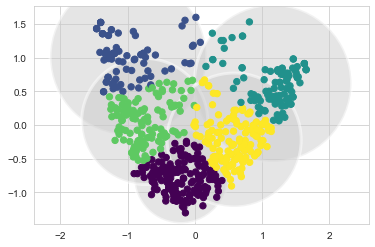

In [17]:
# Plot the KMeans result
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_detail_copy)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plot_kmeans(kmeans, Y_sklearn)